In [2]:
import numpy as np
import pandas as pd
import argparse
from colorama import init, Fore, Style
init(autoreset=True)
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.mixture import GaussianMixture
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, RationalQuadratic, ExpSineSquared, WhiteKernel
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

In [3]:
data1 = pd.read_csv(r"Data\Mass_Yields\U-235_14.csv")
data2 = pd.read_csv(r"Data\Mass_Yields\Pu-240_500.csv")
data3 = pd.read_csv(r"Data\Mass_Yields\Cm-245_0.0253.csv")
data_array1 = np.asarray(data1)
data_array2 = np.asarray(data2)
data_array3 = np.asarray(data3)

# Extract features and labels
X_train1 = data_array1[:, 0]
y_train1 = data_array1[:, 1]

X_train2 = data_array2[:, 0]
y_train2 = data_array2[:, 1]

X_train3 = data_array3[:, 0]
y_train3 = data_array3[:, 1]

X_train1 = X_train1.reshape(-1, 1)
X_train2 = X_train2.reshape(-1, 1)
X_train3 = X_train3.reshape(-1, 1)

# Fit models with different numbers of components
components_range = range(1, 11)

# Initialize variables to store AIC values and GMM models
aic_values1 = []
gmm_models1 = []

# Iterate over different numbers of components
for n_components in components_range:
    # Create and fit GMM
    gmm1 = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm1.fit(data1)
    
    # Store AIC value and model
    aic_values1.append(gmm1.aic(data1))
    gmm_models1.append(gmm1)

# Find the index of the minimum AIC value
best_index1 = np.argmin(aic_values1)

# Retrieve the best GMM model and its number of components
best_gmm1 = gmm_models1[best_index1]
best_n_components1 = components_range[best_index1]

best_gmm1.fit(data1)

sample1, _ = best_gmm1.sample(10000)
sort_sample1 = np.argsort(sample1[:,0])
sample1 = sample1[sort_sample1]

X_test1 = sample1[:,0]
y_test1 = sample1[:,1]

X_test1 = X_test1.reshape(-1,1)

aic_values2 = []
gmm_models2 = []

# Iterate over different numbers of components
for n_components in components_range:
    # Create and fit GMM
    gmm2 = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm2.fit(data2)
    
    # Store AIC value and model
    aic_values2.append(gmm2.aic(data2))
    gmm_models2.append(gmm2)

# Find the index of the minimum AIC value
best_index2 = np.argmin(aic_values2)

# Retrieve the best GMM model and its number of components
best_gmm2 = gmm_models2[best_index2]
best_n_components2 = components_range[best_index2]

best_gmm2.fit(data2)

sample2, _ = best_gmm2.sample(10000)
sort_sample2 = np.argsort(sample2[:,0])
sample2 = sample2[sort_sample2]

X_test2 = sample2[:,0]
y_test2 = sample2[:,1]

X_test2 = X_test2.reshape(-1,1)

aic_values3 = []
gmm_models3 = []

# Iterate over different numbers of components
for n_components in components_range:
    # Create and fit GMM
    gmm3 = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm3.fit(data3)
    
    # Store AIC value and model
    aic_values3.append(gmm3.aic(data3))
    gmm_models3.append(gmm3)

# Find the index of the minimum AIC value
best_index3 = np.argmin(aic_values3)

# Retrieve the best GMM model and its number of components
best_gmm3 = gmm_models3[best_index3]
best_n_components3 = components_range[best_index3]

best_gmm3.fit(data3)

sample3, _ = best_gmm3.sample(10000)
sort_sample3 = np.argsort(sample3[:,0])
sample3 = sample3[sort_sample3]

X_test3 = sample3[:,0]
y_test3 = sample3[:,1]

X_test3 = X_test3.reshape(-1,1)



In [4]:
kernel = ConstantKernel() * RBF(length_scale=24, length_scale_bounds=(1e-5, 2)) * \
RationalQuadratic(length_scale=1, alpha=0.5, length_scale_bounds=(1e-5, 2), alpha_bounds=(1e-05, 1000)) + \
ExpSineSquared(length_scale=24, periodicity=1)

# Train Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=300)
gp.fit(X_train1, y_train1)
y_pred_1, sigma_1 = gp.predict(X_test1, return_std=True)


C:\Users\billt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\billt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\billt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-package

In [5]:
kernel = ConstantKernel() * RBF(length_scale=24, length_scale_bounds=(1e-5, 2)) * \
RationalQuadratic(length_scale=1, alpha=0.5, length_scale_bounds=(1e-5, 2), alpha_bounds=(1e-05, 1000)) + \
ExpSineSquared(length_scale=24, periodicity=1) + WhiteKernel(noise_level=0.5)

# Train Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=300)
gp.fit(X_train2, y_train2)
y_pred_2, sigma_2 = gp.predict(X_test2, return_std=True)

C:\Users\billt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\billt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k2__length_scale is close to the specified upper bound 2.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\billt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sk

In [6]:
kernel = ConstantKernel() * RBF(length_scale=24, length_scale_bounds=(1e-5, 2)) * \
RationalQuadratic(length_scale=1, alpha=0.5, length_scale_bounds=(1e-5, 2), alpha_bounds=(1e-05, 1000)) + \
ExpSineSquared(length_scale=24, periodicity=1) + WhiteKernel(noise_level=0.5)

# Train Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=270)
gp.fit(X_train3, y_train3)
y_pred_3, sigma_3 = gp.predict(X_test3, return_std=True)

C:\Users\billt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\billt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k2__length_scale is close to the specified upper bound 2.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\billt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sk

C:\Users\billt\AppData\Local\Temp\ipykernel_17828\279474070.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axs[0].plot(X_test1, y_pred_1,'b-',color='blue', linewidth=1.5, label='GPR-WK')
C:\Users\billt\AppData\Local\Temp\ipykernel_17828\279474070.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(X_test2, y_pred_2,'b-',color='blue', linewidth=1.5, label='GPR-WK')
C:\Users\billt\AppData\Local\Temp\ipykernel_17828\279474070.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axs[2].plot(X_test3, y_pred_3,'b-',color='blue', linewidth=1.5, label='GPR-WK')


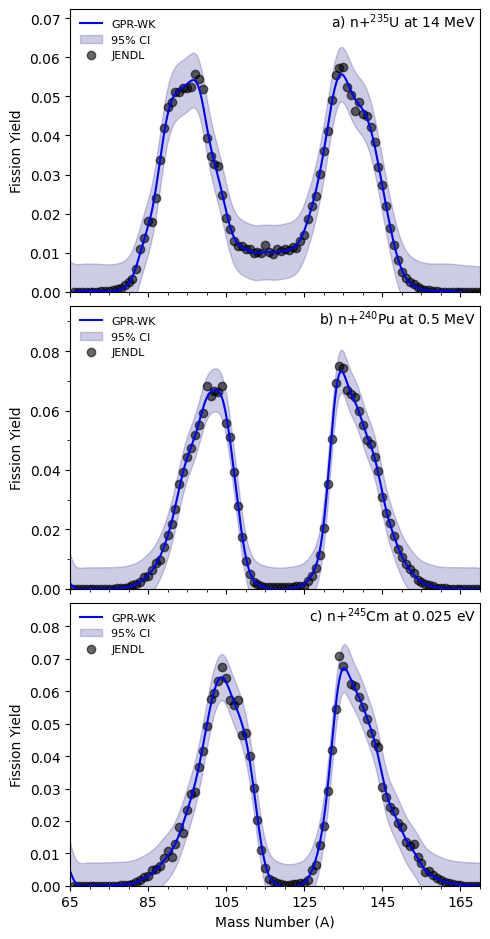

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(5, 10), sharex=True)

axs[0].plot(X_test1, y_pred_1,'b-',color='blue', linewidth=1.5, label='GPR-WK')
axs[0].fill_between(X_test1[:,0], y_pred_1 - 1.96*sigma_1,y_pred_1 + 1.96*sigma_1, alpha=0.2, color='navy', label='95% CI')
axs[0].scatter(X_train1, y_train1, color='black', edgecolor='black', alpha=0.59, label='JENDL')
axs[0].set_ylim(0, y_pred_1.max() + 0.3 * y_pred_1.max())
axs[0].set_xlim(65,170)
axs[0].set_ylabel("Fission Yield")
#axs[0].set_title(r'a) n+$^{235}$U at 0.025 eV')
axs[0].text(0.99, 0.99,r'a) n+$^{235}$U at 14 MeV', horizontalalignment='right', verticalalignment='top', transform=axs[0].transAxes, fontsize=10)
axs[0].legend(fontsize=8, loc='upper left', facecolor='none',edgecolor='none')

# Second subplot
axs[1].plot(X_test2, y_pred_2,'b-',color='blue', linewidth=1.5, label='GPR-WK')
axs[1].fill_between(X_test2[:,0], y_pred_2 - 1.96*sigma_2,y_pred_2 + 1.96*sigma_2, alpha=0.2, color='navy', label='95% CI')
axs[1].scatter(X_train2, y_train2, color='black', edgecolor='black', alpha=0.59, label='JENDL')
axs[1].set_ylim(0, y_pred_2.max() + 0.3 * y_pred_2.max())
axs[1].set_xlim(65,170)
axs[1].set_ylabel("Fission Yield")
#axs[0].set_title(r'a) n+$^{235}$U at 0.025 eV')
axs[1].text(0.99, 0.99,r'b) n+$^{240}$Pu at 0.5 MeV', horizontalalignment='right', verticalalignment='top', transform=axs[1].transAxes, fontsize=10)
axs[1].legend(fontsize=8, loc='upper left', facecolor='none',edgecolor='none')

# Third subplot
axs[2].plot(X_test3, y_pred_3,'b-',color='blue', linewidth=1.5, label='GPR-WK')
axs[2].fill_between(X_test3[:,0], y_pred_3 - 1.96*sigma_3,y_pred_3 + 1.96*sigma_3, alpha=0.2, color='navy', label='95% CI')
axs[2].scatter(X_train3, y_train3, color='black', edgecolor='black', alpha=0.59, label='JENDL')
axs[2].set_ylim(0, y_pred_3.max() + 0.3 * y_pred_3.max())
axs[2].set_xlim(65,170)
axs[2].set_xlabel("Mass Number (A)")
axs[2].set_ylabel("Fission Yield")
#axs[0].set_title(r'a) n+$^{235}$U at 0.025 eV')
axs[2].text(0.99, 0.99,r'c) n+$^{245}$Cm at 0.025 eV', horizontalalignment='right', verticalalignment='top', transform=axs[2].transAxes, fontsize=10)
axs[2].legend(fontsize=8, loc='upper left', facecolor='none',edgecolor='none')

plt.tight_layout(rect=[0, 0, 1, 0.95])
axs[1].set_xticks(np.arange(65, 175, 20))
axs[1].xaxis.set_minor_locator(MultipleLocator(5))
axs[1].yaxis.set_minor_locator(AutoMinorLocator(2))
fig.subplots_adjust(hspace=0.05, wspace=0.1)
plt.savefig('GPR_Samples.png',dpi=300)
plt.show()